# Time Series Project

En la primera etapa nos ocupamos de cargar los datos

# (I) DATA FEED: CARGANDO EL DATASET 

In [1]:
import pandas as pd  # codding
import pandas  # for annotations

import warnings

warnings.filterwarnings("ignore")

from paquete_proyecto.iniciando.bases import importar_databases
from paquete_proyecto.herramientas.data_info import data_info
from paquete_proyecto.iniciando.variables import ajustar_tipos

In [2]:
ventas, ventas_sin_duplicados = importar_databases()

La longitud de la serie Nº 1 es de: 127255
La longitud de la serie Nº 2 es de: 108794


In [3]:
display(ventas.sample(3))
data_info(data=ventas, name="ventas")

,IdCliente,NombreCliente,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area
Fecha,,,,,,,,,,,,
2017-01-04,C900606034,SUBACHOQUETOURS SAS,10,SE-CS-2-0004,BALANCEO BUSETA,106,SERVICIOS,1,2521,Engativa,Calle 80,31
2017-11-12,C91001365,SANDOVAL MILTON,10,REB-0137,REENC TR 750-16,102,REENCAUCHE,4,961345,Engativa,Calle 80,31
2017-10-04,C900900349,GESTION EMPRESARIAL Y SALUD OCUPACIONAL SAS - ...,10,SE-CS-12-0005,REVISION DE FRENOS,106,SERVICIOS,1,21008,Engativa,Calle 80,31


info de ventas,columna,type,count,NaN,NaN_pct,unique,unique_pct
0,IdCliente,object,127255,0,0.0 %,24087,18.93 %
1,NombreCliente,object,127255,0,0.0 %,21816,17.14 %
2,Empleado,int32,127255,0,0.0 %,56,0.04 %
3,Referencia,object,127255,0,0.0 %,1854,1.46 %
4,Descripcion,object,127255,0,0.0 %,1814,1.43 %
5,CodigoFamilia,int32,127255,0,0.0 %,5,0.0 %
6,Familia,object,127255,0,0.0 %,5,0.0 %
7,Cantidad,int32,127255,0,0.0 %,212,0.17 %
8,Ventas,int32,127255,0,0.0 %,14279,11.22 %
9,Localidad,object,127255,0,0.0 %,6,0.0 %


<div>
    <h4>Evaluación de cada columna (DESACTUALIZADO)</h4>
    <ol>
        <li> <b>IdCliente</b>: object - código alfanumérico</li><br />
        <li> <b>NombreCliente</b>: object - string = Nombre, Apellido</li><br />
        <li> <b>>> Empleado</b>: float - cambiar a int</li><br />
        <li> <b>Referencia</b>: object: categoría ordinal</li><br />
        <li> <b>Descripcion</b>: object: categoria cualitativa </li><br />
        <li> <b>>> CodigoFamilia</b>: float64: Cambiar a int</li><br />
        <li> <b>Familia</b>: object: categoria cualitativa</li><br />
        <li> <b>>>Cantidad</b>: object: cambiar a int</li><br />
        <li> <b>>> Ventas</b>: int: cambiar a float</li><br />
        <li> <b>Localidad</b>: object: categoria bussines</li><br />
        <li> <b>>> Area</b>: float: cambiar a int</li><br />
    </ol>
</div>

In [8]:
index = pd.Series().index.name

if isinstance(index, type(None)):
    print ('Hola Mundo')

pd.DataFrame().reset_index()

Hola Mundo


,index


In [ ]:
data = ajustar_tipos(ventas)
data_sin_duplicados = ajustar_tipos(ventas_sin_duplicados)

# (II) DATA PREPARE: COMPLETANDO EL DATASET 


    1- AGREGAR COLUMNA "Ventas_USD" QUE SEA  "Ventas" A LA COTIZACION DEL "USD" DE LA FECHA
    
    2- AGREGAR FILAS DE FECHAS FALTANTES (Para generar muestrars y rankings)
    

## 1- AJUSTAR COTIZACION "Ventas_USD"

In [4]:
from paquete_proyecto.preprocesamiento.forex_api import alpha_vantage_fx_api
from paquete_proyecto.preprocesamiento.cotizacion import criterio_valor_apertura, preparar_cotizacion, agregar_cotizacion

import os
from dotenv import load_dotenv

load_dotenv()

True

In [5]:
TOKEN = os.environ["TOKEN_AV"]

cotizacion = alpha_vantage_fx_api("FX_WEEKLY", "COP", "USD", TOKEN)
cotizacion = criterio_valor_apertura(preparar_cotizacion(data, cotizacion),  "COP/USD")

data = agregar_cotizacion(data, cotizacion)
data.loc[:, "Ventas_USD"] = data['Ventas'] * data['Cotizacion_USD']

In [6]:
data

,IdCliente,NombreCliente,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area,Cotizacion_USD,Ventas_USD
Fecha,,,,,,,,,,,,,,
2016-01-09,C1070956433,PINTO JOHN,24,LL-2R-0038,PILOT STREET 110/80-17,101,LLANTA,1,129310.0,Puente aranda,Calle 13,35,0.00030,38.79300
2016-01-09,C19347046,RUIZ LUIS FERNANDO,10,SE-CS-2-0001,BALANCEO AUTO,106,SERVICIOS,4,31035.0,Engativa,Calle 80,31,0.00030,9.31050
2016-01-09,C800232717,CORSO Y CIA S EN C,10,SE-CS-2-0002,BALANCEO CAMIONETA,106,SERVICIOS,4,31034.0,Engativa,Calle 80,31,0.00030,9.31020
2016-01-09,C79523685,GONZALEZ JUAN CARLOS,10,SE-CS-2-0002,BALANCEO CAMIONETA,106,SERVICIOS,4,31034.0,Engativa,Calle 80,31,0.00030,9.31020
2016-01-09,C800214037,EXPRESER SAS,5,REB-0063,REENC XZE1 235/75R17.5,102,REENCAUCHE,1,29892.0,Engativa,Ventas externas,22,0.00030,8.96760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-02,C17050457,GAMBOA PAEZ JOSE MARIO,44,SE-CS-1-0001,ALINEACION AUTO,106,SERVICIOS,1,37815.0,Engativa,Calle 80,31,0.00028,10.58820
2020-12-02,C51590721,DAZA MIRIAM,44,SE-CS-1-0006,ALINEACION BUS,106,SERVICIOS,1,37815.0,Engativa,Calle 80,31,0.00028,10.58820
2020-12-02,C860517112,TRANSPORTES ESPECIALES COLEGIOS Y TURISMO SA,50,SE-CS-1-0005,ALINEACION BUSETA O CAMION LIVIANO,106,SERVICIOS,1,37815.0,Puente aranda,Calle 13,35,0.00028,10.58820


## 2- PREPARAR DATASETS PARA MUESTREOS TEMPORALES

    2.1- Completar fechas faltante

    2.2- Armar muestreos temporales

    2.3- Visualizar poblacion

------DESC------

Primero tenemos que armar cada una de las series temporales

Para poder aplicar Cross-Validation a la serie temporal, es necesario completar con las fechas faltantes con algun valor default en sus variables. De esta forma podremos garantizar que nuestro folds representan el mismo timedelta.

------EJ------

Para hacer cross validation con scikit learn sobre data:

Si empezamos por 2016-01-09 y terminamos en 2020-12-02, tenemos 1790 días.

Como querémos cortes de igual tamaño, y sin gap al max_train_size y al test_size le damos el mismo valor.

Como queremos cortes bimensuales ingresamos los parámetros con valor 60.

Para n_splits hacemos 1790 / 60 = 29.8 por eso elegimos 29 folds.

In [7]:
from paquete_proyecto.preprocesamiento.muestreo import complete_dates
from paquete_proyecto.preprocesamiento.muestreo import timeseries_cv

In [8]:
data_complete = complete_dates(ventas)
## aca podría faltar un fillna

lista_mensual = timeseries_cv(data_complete, 59, 30, 30)

### visualizar población lista_mensual

[Text(0.5, 1.0, 'Cantidad de ventas cada 30 días')]

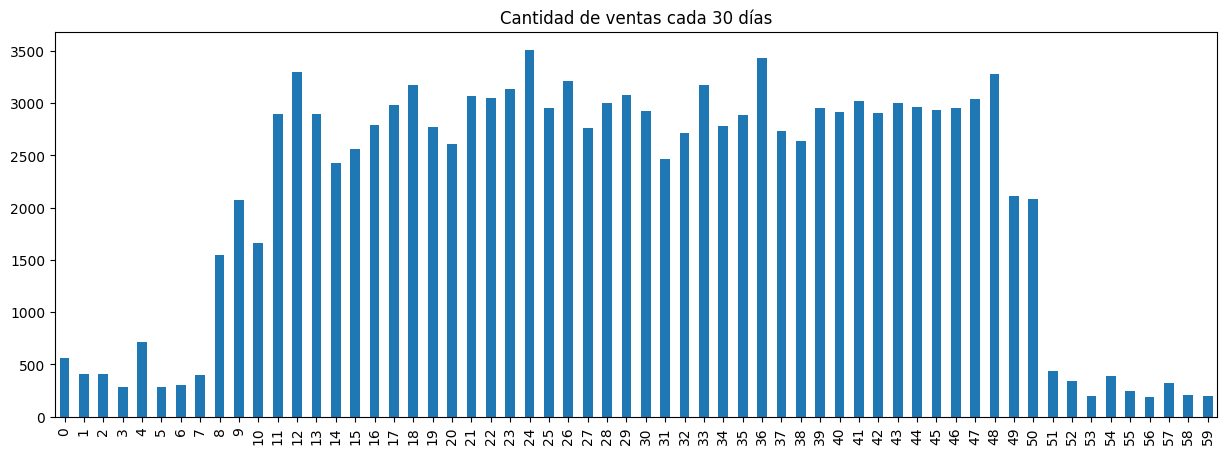

In [9]:
longitud = []
for elemento in lista_mensual:
    longitud.append(len(elemento.dropna()))

pd.Series(longitud).plot.bar(figsize=(15, 5)).set(
    title="Cantidad de ventas cada 30 días"
)

In [10]:
# AttributeError: AxesSubplot.set() got an unexpected keyword argument 'style'
# import matplotlib.pyplot as plt

### help (plt.axes.AxesSubplot.set())

In [11]:
# Habia una cuestion de ranking que queriamos tratar con este objetivo de cortar los datasets

# (III) RESEARCH:
    1- CREANDO INDICADORES BASICOS
    2- CREANDO LAS REPRESENTACIONES TEMPORALES 
Para cada una de las variables, debería haber una representación temporal, en el que cada registro represente una día unicamente

In [12]:
# crear una pivot table. que en el indice tenga fechas, en las columnas tenga localidad, y que los valores sean la cantidad de clientes que tuvo.

pd.pivot_table(
    data_complete, values="IdCliente", index="Fecha", columns="Localidad", aggfunc="count"
)

Localidad,Barrios unidos,Bogota,Engativa,Puente aranda,Suba,Usaquen
Fecha,,,,,,
2016-01-09,7.0,16.0,68.0,11.0,19.0,11.0
2016-01-10,6.0,19.0,37.0,4.0,22.0,8.0
2016-01-11,7.0,17.0,100.0,29.0,13.0,5.0
2016-01-12,5.0,14.0,107.0,5.0,17.0,12.0
2016-02-09,3.0,1.0,46.0,33.0,11.0,7.0
...,...,...,...,...,...,...
2020-10-02,5.0,17.0,79.0,11.0,13.0,NaN
2020-10-03,3.0,NaN,41.0,20.0,16.0,8.0
2020-11-01,2.0,2.0,49.0,12.0,14.0,9.0


In [13]:
# crear una pivot table como la anterior, que en los values tenga cantidad de empleados
pd.pivot_table(
    data, values="Empleado", index="Fecha", columns="Localidad", aggfunc="count"
)

print(
    "Al parecer por cada transacción hay un empleado, no hay 2 transacciones realizadas por el mismo empleado en 1 dia"
)

Al parecer por cada transacción hay un empleado, no hay 2 transacciones realizadas por el mismo empleado en 1 dia


In [14]:
data.Familia.unique()

array(['LLANTA', 'SERVICIOS', 'REENCAUCHE', 'LUBRICANTES', 'FILTROS'],
      dtype=object)